<a href="https://colab.research.google.com/github/jasleen1589/Final-Project_Group5/blob/jkaur/Heart_Health_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
#Dependecies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
# Assuming you've uploaded the CSV to your Google Colab session
heart_df = pd.read_csv('heart_disease_health_indicators.csv')


Load the data

In [122]:
#Identify missing values
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

In [123]:
#Removing the null values

heart_df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [124]:
columns_with_missing_values = ['Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
df_cleaned_specific = df.dropna(subset=columns_with_missing_values)


Data Pre-Processing

In [125]:
# Assuming there are no categorical variables to encode in this dataset
# Select features and target
X = df.drop('HeartDiseaseorAttack', axis=1)  # Features
y = df['HeartDiseaseorAttack']  # Target variable


Split the Data

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Scaling

In [127]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Build the Model

In [128]:
pip install scikit-learn

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
model = LogisticRegression(random_state=42)

In [131]:
from sklearn.ensemble import RandomForestClassifier

# Example of initializing a RandomForestClassifier, which does use n_estimators
model = RandomForestClassifier(n_estimators=100, random_state=42)



In [132]:
print(y_train.head())

97959     0
116345    0
128909    0
31522     0
82000     0
Name: HeartDiseaseorAttack, dtype: int64


In [133]:
print(y_train.isna().sum())

0


In [134]:
#If y_train contains missing values:
y_train = y_train.dropna()

In [135]:
!pip install scikit-learn
from sklearn.impute import SimpleImputer

In [136]:
imputer = SimpleImputer(strategy="mean")
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1))

In [137]:
from sklearn.impute import SimpleImputer
import numpy as np

# Create an imputer object with a strategy of filling missing values with the mean of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Don't forget to transform the test data as well, using the same imputer (without fitting it again)
X_test_imputed = imputer.transform(X_test)

# Now you can fit the model with the imputed data
model.fit(X_train_imputed, y_train)


<ipython-input-137-33d905ddc70c>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_imputed, y_train)


RandomForestClassifier(random_state=42)

In [138]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# After cleaning, proceed with your feature/target selection, data splitting, and so on


In [139]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier

# Initialize the model that can handle NaN values
model_with_nan_support = HistGradientBoostingClassifier()

# This model can be directly fitted with data containing NaNs
model_with_nan_support.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier()

In [105]:
#model.fit?

In [140]:
model.fit(X_train, y_train)

<ipython-input-140-d768f88d541e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# After fitting the model, you can use it to make predictions or assess its performance
# Correct way to make predictions
#y_pred = model.predict(X_test)


Evaluate the Model

In [146]:
# Define a pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42))  # Classifier
])

# Define a grid of parameters to search
param_grid = {
    'imputer__strategy': ['mean', 'median'],  # Try different strategies for imputation
    'classifier__C': [0.1, 1, 10],  # Regularization strength for LogisticRegression
    'classifier__solver': ['liblinear', 'saga']  # Optimization algorithms
}

In [147]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data using the pipeline
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9072280854459073


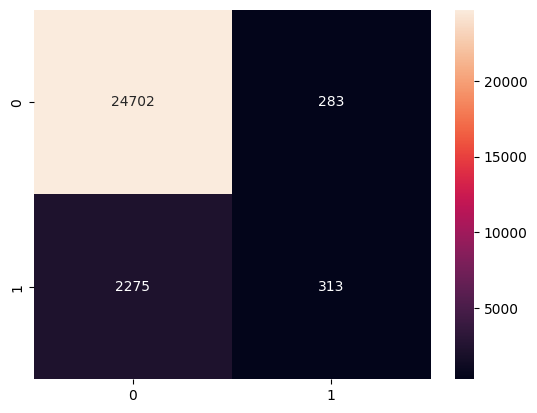

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     24985
           1       0.53      0.12      0.20      2588

    accuracy                           0.91     27573
   macro avg       0.72      0.55      0.57     27573
weighted avg       0.88      0.91      0.88     27573



In [148]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


# **Optimize the Model**



In [149]:
# Define a grid of parameters to search
param_grid = {
    'imputer__strategy': ['mean', 'median'],  # Try different strategies for imputation
    'classifier__C': [0.1, 1, 10],  # Regularization strength for LogisticRegression
    'classifier__solver': ['liblinear', 'saga']  # Optimization algorithms
}

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
# Define the pipeline and parameter grid
pipeline = ...
param_grid = ...

In [152]:
# Instantiate the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

In [153]:
import pandas as pd

In [155]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [156]:
print(X_train.head())
print(y_train.head())

        0         1         2         3         4         5         6   \
0  1.15323 -0.861527  0.196519  0.223245 -0.896897 -0.207032 -0.425294   
1  1.15323 -0.861527  0.196519  0.798741 -0.896897 -0.207032 -0.425294   
2 -0.86713 -0.861527  0.196519 -0.783872 -0.896897 -0.207032 -0.425294   
3 -0.86713 -0.861527  0.196519 -1.503241 -0.896897 -0.207032 -0.425294   
4 -0.86713 -0.861527 -5.088560  0.510993  1.114955 -0.207032 -0.425294   

         7         8         9   ...        11        12        13        14  \
0 -1.780336  0.753199  0.484249  ...  0.225525 -0.295715  0.466729 -0.425506   
1 -1.780336  0.753199  0.484249  ...  0.225525 -0.295715  0.466729 -0.425506   
2 -1.780336  0.753199 -2.065052  ...  0.225525 -0.295715  1.404969 -0.425506   
3  0.561692  0.753199  0.484249  ...  0.225525 -0.295715  0.466729 -0.013376   
4  0.561692  0.753199  0.484249  ...  0.225525 -0.295715 -0.471510 -0.150753   

         15        16        17        18       19        20  
0 -0.483517

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
from sklearn.model_selection import GridSearchCV

In [170]:
print(X_train)

             0         1         2         3         4         5         6   \
0       1.15323 -0.861527  0.196519  0.223245 -0.896897 -0.207032 -0.425294   
1       1.15323 -0.861527  0.196519  0.798741 -0.896897 -0.207032 -0.425294   
2      -0.86713 -0.861527  0.196519 -0.783872 -0.896897 -0.207032 -0.425294   
3      -0.86713 -0.861527  0.196519 -1.503241 -0.896897 -0.207032 -0.425294   
4      -0.86713 -0.861527 -5.088560  0.510993  1.114955 -0.207032 -0.425294   
...         ...       ...       ...       ...       ...       ...       ...   
110285  1.15323  1.160730  0.196519  0.223245 -0.896897  4.830162  2.442677   
110286  1.15323 -0.861527  0.196519  2.381353  1.114955 -0.207032 -0.425294   
110287  1.15323  1.160730  0.196519  0.079371  1.114955 -0.207032 -0.425294   
110288 -0.86713  1.160730  0.196519 -0.496124 -0.896897 -0.207032 -0.425294   
110289  1.15323 -0.861527  0.196519  0.942614 -0.896897 -0.207032  2.442677   

              7         8         9   ...        11

In [174]:
print(X_train.shape)
print(df.columns.shape)

(110290, 21)
(22,)


In [176]:
num_cols_transformed = X_train.shape[1]
num_cols_original = df.columns.shape[0]

print(f"Number of columns in transformed data: {num_cols_transformed}")
print(f"Number of columns in original DataFrame: {num_cols_original}")

Number of columns in transformed data: 21
Number of columns in original DataFrame: 22


In [178]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [ ]:
# Fit the GridSearchCV object
#grid_search.fit(X_train, y_train)



In [182]:
print(locals())

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "# Define a grid of parameters to search\nparam_grid = {\n    'imputer__strategy': ['mean', 'median'],  # Try different strategies for imputation\n    'classifier__C': [0.1, 1, 10],  # Regularization strength for LogisticRegression\n    'classifier__solver': ['liblinear', 'saga']  # Optimization algorithms\n}", '# Set up GridSearchCV\ngrid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=\'accuracy\', verbose=1)\n\n# Fit GridSearchCV\ngrid_search.fit(X_train_scaled, y_train)\n\n# Best parameters found\nprint("Best parameters:", grid_search.best_params_)\n\n# Evaluate on the test set\ny_pred = grid_search.predict(X_test_scaled)\nprint(classification_report(y_test, y_pred))', '# Set up GridSearchCV\ngrid_search = 

In [187]:
print(type(grid_search))

<class 'sklearn.model_selection._search.GridSearchCV'>


In [188]:
print(dir(grid_search))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_check_refit_for_multimetric', '_estimator_type', '_format_results', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_run_search', '_select_best_index', '_validate_data', '_validate_params', 'classes_', 'cv', 'decision_function', 'error_score', 'estimator', 'fit', 'get_params', 'inverse_transform', 'n_features_in_', 'n_jobs', 'param_grid', 'pre_dispatch', 'predict', 'predict_log_proba', 'predict_proba', 'refit', 'return_train_score', 'score', 'score_samples

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Example setup (replace with your actual setup)
param_grid = {'n_estimators': [100, 200], 'max_depth': [2, 5]}
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)  # Ensure this line executes successfully

# Then access best_params_
print("Best parameters:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best parameters: {'max_depth': 5, 'n_estimators': 100}


In [197]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# More detailed performance analysis
print(classification_report(y_test, y_pred))


Accuracy: 0.9072280854459073
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     24985
           1       0.53      0.12      0.20      2588

    accuracy                           0.91     27573
   macro avg       0.72      0.55      0.57     27573
weighted avg       0.88      0.91      0.88     27573

